In [1]:
# import libraries
import torch
from torchvision import models, datasets
from torchvision import transforms
from torch import nn, optim
from torch.utils.data.dataloader import DataLoader

import time
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

In [2]:
# applying transforms to the data
image_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8,1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}

In [11]:
# Load data
# Set train, valid, and test directory
train_directory = 'food-101/train_15'
valid_directory = 'food-101/valid_15'


# batch size
bs = 32

# number of epochs
epochs = 20

# number of classes
num_classes = 17

# device 

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Load data from directory
data = {
    'train': datasets.ImageFolder(root=train_directory,
                                  transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=valid_directory,
                                  transform=image_transforms['valid']),
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# size of data, to be used for calculating Averge Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])


# Create iterators for the Data loaded using DataLoader module
train_data = DataLoader(data['train'], batch_size=bs, shuffle=True)
valid_data = DataLoader(data['valid'], batch_size=bs, shuffle=True)


train_data_size, valid_data_size

{0: 'apple_pie', 1: 'chicken_wings', 2: 'club_sandwich', 3: 'donuts', 4: 'french_fries', 5: 'hamburger', 6: 'hot_dog', 7: 'ice_cream', 8: 'mussels', 9: 'onion_rings', 10: 'pad_thai', 11: 'pizza', 12: 'sushi', 13: 'tacos', 14: 'waffles'}


(11250, 3750)

In [4]:
#load pretrained resnet50
#resnet_50 = models.vgg16(pretrained=True)
model = models.resnet50(pretrained=True)
#resnet_50 = models.vgg11(pretrained=True)
# Freeze model parameters, coz we are fine-tuning
for param in model.parameters():
  param.requires_grad = False
# change the final layer of Resnet50 Model for fine-tuning
fc_inputs = model.fc.in_features
#fc_inputs  = resnet_50.classifier[6].in_features
model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4), 
    nn.Linear(256, len(idx_to_class)),
    nn.LogSoftmax(dim=1) # for using NLLLoss()
)

# convert model to GPU
model = model.to(device)


# define optimizer and loss function
loss_func = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

print(model)  

c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [4]:
#load pretrained resnet50
#resnet_50 = models.vgg16(pretrained=True)
model = models.resnet18(pretrained=False)

fc_inputs = model.fc.in_features
#fc_inputs  = resnet_50.classifier[6].in_features
model.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4), 
    nn.Linear(256, len(idx_to_class)),
    nn.LogSoftmax(dim=1) # for using NLLLoss()
)

# convert model to GPU
model = model.to(device)


# define optimizer and loss function
loss_func = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

print(model)  

c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [12]:

class resnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg16 = models.vgg16(pretrained=True)
        for param in self.vgg16.parameters():
            param.requires_grad = False
        self.vgg16.classifier = nn.Sequential(*list(self.vgg16.classifier.children())[:-6])
       
        self.fc = self.vgg16.classifier[0].in_features
        self.fc = nn.Sequential(
            nn.Linear(4096, 256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, len(idx_to_class)), nn.LogSoftmax(dim=1))

        
    def forward(self,x):
        output=self.vgg16(x)
        return self.fc(output)


model = resnet()


  
model = model.to(device)

print(model)
        


    

c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


resnet(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

In [8]:
class efficientnet_b7(nn.Module):
    def __init__(self):
        super().__init__()
        self.vgg16 = models.efficientnet_b7(pretrained=True)
        for param in self.vgg16.parameters():
            param.requires_grad = False
        
       
        
        self.fc = nn.Sequential(
            nn.Linear(1000, 256), nn.ReLU(), nn.Dropout(0.4),
            nn.Linear(256, len(idx_to_class)), nn.LogSoftmax(dim=1))

        
    def forward(self,x):
        output=self.vgg16(x)
        return self.fc(output)


model = efficientnet_b7()


  
model = model.to(device)

print(model)

c:\Users\isak1\anaconda3\envs\tf-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B7_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B7_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


efficientnet_b7(
  (vgg16): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
              (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
              (s

In [10]:
from torchsummary import summary
summary(model, input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [5]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)
  
    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''
    
    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data):

            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
           
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            
            
            # Compute total accuracy in the whole batch and add to train_acc
            
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():

            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(train_data):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                train_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                train_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size

        # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()
    
        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch+1, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        # torch.save(model, 'model_'+str(epoch)+'.pt')
            
    return model, history

In [6]:
num_epochs = 60
loss_func = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())
trained_model, history = train_and_validate(model, loss_func, optimizer, num_epochs)
torch.save(history, 'history.pt')

Epoch: 1/60
Epoch : 001, Training: Loss: 2.4344, Accuracy: 20.9333%, 
		Validation : Loss : 2.3834, Accuracy: 21.7333%, Time: 196.1439s
Epoch: 2/60
Epoch : 002, Training: Loss: 2.4238, Accuracy: 21.6800%, 
		Validation : Loss : 2.3800, Accuracy: 21.7067%, Time: 161.1546s
Epoch: 3/60
Epoch : 003, Training: Loss: 2.4431, Accuracy: 20.6756%, 
		Validation : Loss : 2.3989, Accuracy: 21.8667%, Time: 153.8687s
Epoch: 4/60
Epoch : 004, Training: Loss: 2.5523, Accuracy: 18.4622%, 
		Validation : Loss : 2.5278, Accuracy: 18.4267%, Time: 160.8142s
Epoch: 5/60
Epoch : 005, Training: Loss: 2.3019, Accuracy: 26.5244%, 
		Validation : Loss : 2.2791, Accuracy: 26.7733%, Time: 160.1356s
Epoch: 6/60
Epoch : 006, Training: Loss: 2.1113, Accuracy: 32.9067%, 
		Validation : Loss : 2.0661, Accuracy: 32.9067%, Time: 150.6601s
Epoch: 7/60
Epoch : 007, Training: Loss: 2.0385, Accuracy: 33.4222%, 
		Validation : Loss : 1.9868, Accuracy: 33.9733%, Time: 152.2530s
Epoch: 8/60
Epoch : 008, Training: Loss: 2.1582,

In [7]:
torch.save(trained_model,'trained_res18.pt')

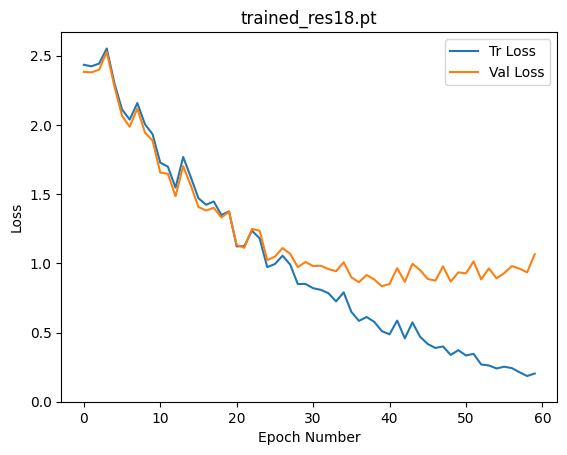

In [8]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.title("trained_res18.pt")
plt.ylabel('Loss')
plt.ylim(0)
plt.savefig('loss_curve.png')
plt.show()

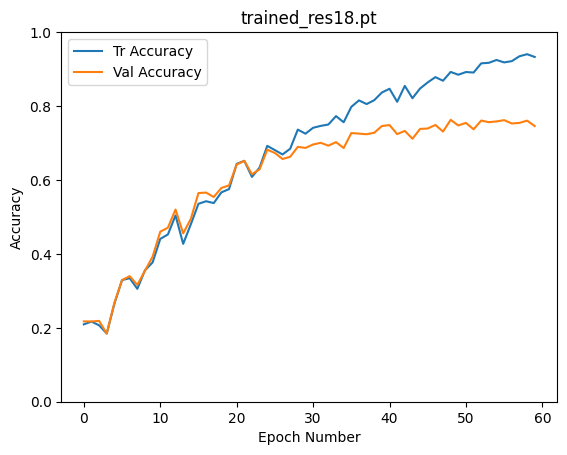

In [9]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title("trained_res18.pt")
plt.ylim(0,1)
plt.savefig('_accuracy_curve.png')
plt.show()

In [13]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(3, dim=1)
        for i in range(3):
            print("Predcition", i+1, ":", idx_to_class[topclass.cpu().numpy()[0][i]], ", Score: ", topk.cpu().numpy()[0][i])

In [11]:
model = torch.load('trained_vgg16_5.pt')


predict(model, 'food-101/train_5/chicken_wings/490.jpg')

AttributeError: Can't get attribute 'resnet' on <module '__main__'>

In [29]:
model = torch.load('trained_res_15.pt')

In [14]:
model = torch.load('trained_vgg16_15.pt')

In [35]:
model = torch.load('trained_effnet_15.pt')

               apple_pie  chicken_wings  club_sandwich  donuts  french_fries  \
apple_pie          0.628          0.032          0.008   0.036         0.008   
chicken_wings      0.032          0.900          0.004   0.020         0.004   
club_sandwich      0.028          0.016          0.720   0.000         0.052   
donuts             0.032          0.004          0.000   0.864         0.000   
french_fries       0.016          0.032          0.016   0.000         0.828   
hamburger          0.052          0.068          0.020   0.008         0.024   
hot_dog            0.020          0.016          0.016   0.004         0.024   
ice_cream          0.064          0.012          0.000   0.036         0.000   
mussels            0.004          0.008          0.000   0.008         0.000   
onion_rings        0.124          0.064          0.000   0.052         0.008   
pad_thai           0.000          0.004          0.000   0.000         0.000   
pizza              0.012          0.004 

<Figure size 15000x15000 with 0 Axes>

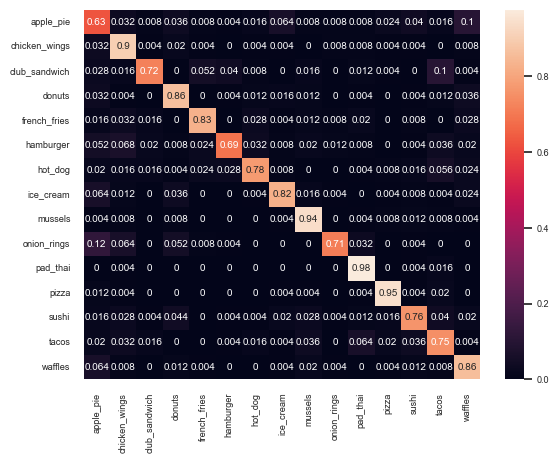

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in valid_data:
        inputs = inputs.to(device)
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
#classes = ('apple_pie', 'chicken_wings', 'club_sandwich', 'donuts', 'french_fries')
classes= ('apple_pie',  'chicken_wings',  'club_sandwich',  'donuts',  'french_fries',  'hamburger',  'hot_dog',  'ice_cream',  'mussels',  'onion_rings',  'pad_thai',  'pizza', 'sushi',  'tacos',  'waffles')
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred,normalize='true')
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],                    columns = [i for i in classes])

#df_cm = pd.DataFrame(cf_matrix ,index = [i for i in classes], columns = [i for i in classes])

plt.figure(figsize = (150,150))
print(df_cm)
plt.show()
sn.set(font_scale=0.6)
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []
pros=0
hold=0
valid_acc = 0
# iterate over test data
for j, (inputs, labels) in enumerate(valid_data):
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass - compute outputs on input data using the model
        outputs = model(inputs)




        # Calculate validation accuracy
        ret, predictions = torch.max(outputs.data, 1)
        correct_counts = predictions.eq(labels.data.view_as(predictions))

        # Convert correct_counts to float and then compute the mean
        acc = torch.mean(correct_counts.type(torch.FloatTensor))

        # Compute total accuracy in the whole batch and add to valid_acc
        valid_acc += acc.item() * inputs.size(0)

print(valid_acc/valid_data_size)
                




0.7293333333015442
